# Establishing a Baseline

Let's revisit the COMPAS Recidivism Risk Scores dataset and the ProPublica analysis.

References:

https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing

https://github.com/propublica/compas-analysis

In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
# Read dataset
crime_df = pd.read_csv('./pb_compas.csv')
crime_df

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,6/2/85,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,alexsandra,beauchamps,Female,21/12/1984,31,25 - 45,African-American,0,...,NaN,Risk of Recidivism,6,Medium,29/12/2014,Risk of Violence,4,Low,5,0
18312,NaN,winston gregory,winston,gregory,Male,1/10/58,57,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/01/2014,Risk of Violence,1,Low,0,0
18313,NaN,farrah jean,farrah,jean,Female,17/11/1982,33,25 - 45,African-American,0,...,NaN,Risk of Recidivism,2,Low,9/3/14,Risk of Violence,2,Low,3,0
18314,NaN,florencia sanmartin,florencia,sanmartin,Female,18/12/1992,23,Less than 25,Hispanic,0,...,NaN,Risk of Recidivism,4,Low,30/06/2014,Risk of Violence,4,Low,2,0


In [3]:
# list columns
crime_df.columns

Index(['id', 'name', 'first', 'last', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'violent_recid', 'is_violent_recid',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'priors_count.1', 'event'],
      dtype='object')

In [4]:
# general dataset information
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   sex                      18316 non-null  object 
 5   dob                      18316 non-null  object 
 6   age                      18316 non-null  int64  
 7   age_cat                  18316 non-null  object 
 8   race                     18316 non-null  object 
 9   juv_fel_count            18316 non-null  int64  
 10  decile_score             18316 non-null  int64  
 11  juv_misd_count           18316 non-null  int64  
 12  juv_other_count          18316 non-null  int64  
 13  priors_count             18316 non-null  int64  
 14  days_b_screening_arres

In [5]:
# clean up
# drop duplicate rows ignoring the id column
crime_df.drop_duplicates(subset=crime_df.columns.difference(['id']), inplace=True)
# crime_df.drop_duplicates(inplace=True)

crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11300 entries, 0 to 18314
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6789 non-null   float64
 1   name                     11300 non-null  object 
 2   first                    11300 non-null  object 
 3   last                     11300 non-null  object 
 4   sex                      11300 non-null  object 
 5   dob                      11300 non-null  object 
 6   age                      11300 non-null  int64  
 7   age_cat                  11300 non-null  object 
 8   race                     11300 non-null  object 
 9   juv_fel_count            11300 non-null  int64  
 10  decile_score             11300 non-null  int64  
 11  juv_misd_count           11300 non-null  int64  
 12  juv_other_count          11300 non-null  int64  
 13  priors_count             11300 non-null  int64  
 14  days_b_screening_arrest  10

In [6]:
# drop duplicate columns - axis{0 or ‘index’, 1 or ‘columns’}, default 0
#(axis='columns'), the drop() method removes the specified column.
#(axis='index'), the drop() method removes the specified row
crime_df.drop(['decile_score.1','priors_count.1'], axis=1, inplace=True)

In [7]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11300 entries, 0 to 18314
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6789 non-null   float64
 1   name                     11300 non-null  object 
 2   first                    11300 non-null  object 
 3   last                     11300 non-null  object 
 4   sex                      11300 non-null  object 
 5   dob                      11300 non-null  object 
 6   age                      11300 non-null  int64  
 7   age_cat                  11300 non-null  object 
 8   race                     11300 non-null  object 
 9   juv_fel_count            11300 non-null  int64  
 10  decile_score             11300 non-null  int64  
 11  juv_misd_count           11300 non-null  int64  
 12  juv_other_count          11300 non-null  int64  
 13  priors_count             11300 non-null  int64  
 14  days_b_screening_arrest  10

In [8]:
# explore the dataset
columns = crime_df.columns
for col in columns:
    print('****',col,'****')
    print(crime_df[col].describe())

**** id ****
count     6789.000000
mean      5493.443659
std       3174.346943
min          1.000000
25%       2733.000000
50%       5505.000000
75%       8234.000000
max      10999.000000
Name: id, dtype: float64
**** name ****
count                  11300
unique                 10855
top       michael cunningham
freq                       4
Name: name, dtype: object
**** first ****
count       11300
unique       3876
top       michael
freq          247
Name: first, dtype: object
**** last ****
count        11300
unique        5635
top       williams
freq           142
Name: last, dtype: object
**** sex ****
count     11300
unique        2
top        Male
freq       9014
Name: sex, dtype: object
**** dob ****
count      11300
unique      7485
top       3/1/86
freq           7
Name: dob, dtype: object
**** age ****
count    11300.000000
mean        35.001239
std         11.986355
min         18.000000
25%         25.000000
50%         32.000000
75%         43.000000
max         96.0000

In [9]:
# violent_recid has no values and type_of_assessment and v_type_of_assessment only has one value which is not very useful 
crime_df.drop(['violent_recid','type_of_assessment','v_type_of_assessment'], axis=1, inplace=True)

In [10]:
# select columns of interest 
crime_df = crime_df[['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count', 
                    'days_b_screening_arrest', 'decile_score', 'is_recid', 'c_jail_in', 'c_jail_out']]
crime_df.shape

(11300, 12)

In [11]:
# summary statistics of columns of interest
columns = crime_df.columns
for col in columns:
    print('****',col,'****')
    print(crime_df[col].describe())

**** age ****
count    11300.000000
mean        35.001239
std         11.986355
min         18.000000
25%         25.000000
50%         32.000000
75%         43.000000
max         96.000000
Name: age, dtype: float64
**** c_charge_degree ****
count     10606
unique       14
top        (F3)
freq       5723
Name: c_charge_degree, dtype: object
**** race ****
count                11300
unique                   6
top       African-American
freq                  5641
Name: race, dtype: object
**** age_cat ****
count       11300
unique          3
top       25 - 45
freq         6405
Name: age_cat, dtype: object
**** score_text ****
count     11286
unique        3
top         Low
freq       6258
Name: score_text, dtype: object
**** sex ****
count     11300
unique        2
top        Male
freq       9014
Name: sex, dtype: object
**** priors_count ****
count    11300.000000
mean         3.153894
std          4.729981
min          0.000000
25%          0.000000
50%          1.000000
75%          4

In [12]:
crime_df

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,c_jail_in,c_jail_out
0,69,(F3),Other,Greater than 45,Low,Male,0,-1.0,1,0,13/08/2013 6:03,14/08/2013 5:41
2,31,NaN,Caucasian,25 - 45,Medium,Male,0,NaN,5,-1,NaN,NaN
3,34,(F3),African-American,25 - 45,Low,Male,0,-1.0,3,1,26/01/2013 3:45,5/2/13 5:36
4,24,(F3),African-American,Less than 25,Low,Male,4,-1.0,4,1,13/04/2013 4:58,14/04/2013 7:02
9,23,(F3),African-American,Less than 25,High,Male,1,NaN,8,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18310,23,(F3),African-American,Less than 25,Low,Male,0,-1.0,3,0,31/01/2014 7:13,2/2/14 4:03
18311,31,(M1),African-American,25 - 45,Medium,Female,5,-1.0,6,0,28/12/2014 10:14,7/1/15 11:42
18312,57,(F2),Other,Greater than 45,Low,Male,0,-1.0,1,0,13/01/2014 5:48,14/01/2014 7:49
18313,33,(M1),African-American,25 - 45,Low,Female,3,-1.0,2,0,8/3/14 8:06,9/3/14 12:18


The ProPublica analysis filtered the underlying data from Broward county to include only those rows representing people who had either recidivated in two years, or had at least two years outside of a correctional facility. They also dropped records if the charge date was not within 30 days from when the person was arrested. Ordinary traffic offenses were also removed (those with a c_charge_degree of 'O') since they do not result in any jail time as well as records that were missing decile_score and decile_text.

In [13]:
# filter records
crime_df = crime_df[(crime_df['days_b_screening_arrest'] <= 30) & (crime_df['days_b_screening_arrest'] >= -30) & (crime_df['is_recid'] != -1) & (crime_df['decile_score'] != -1)&(crime_df['c_charge_degree'] != "O") & (crime_df['score_text'] != 'N/A')]
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9036 entries, 0 to 18314
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      9036 non-null   int64  
 1   c_charge_degree          9036 non-null   object 
 2   race                     9036 non-null   object 
 3   age_cat                  9036 non-null   object 
 4   score_text               9036 non-null   object 
 5   sex                      9036 non-null   object 
 6   priors_count             9036 non-null   int64  
 7   days_b_screening_arrest  9036 non-null   float64
 8   decile_score             9036 non-null   int64  
 9   is_recid                 9036 non-null   int64  
 10  c_jail_in                9036 non-null   object 
 11  c_jail_out               9036 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 917.7+ KB


In [14]:
# group by race
crime_df.groupby("race").size().sort_values()

race
Native American       24
Asian                 47
Other                536
Hispanic             774
Caucasian           3104
African-American    4551
dtype: int64

<Axes: xlabel='sex'>

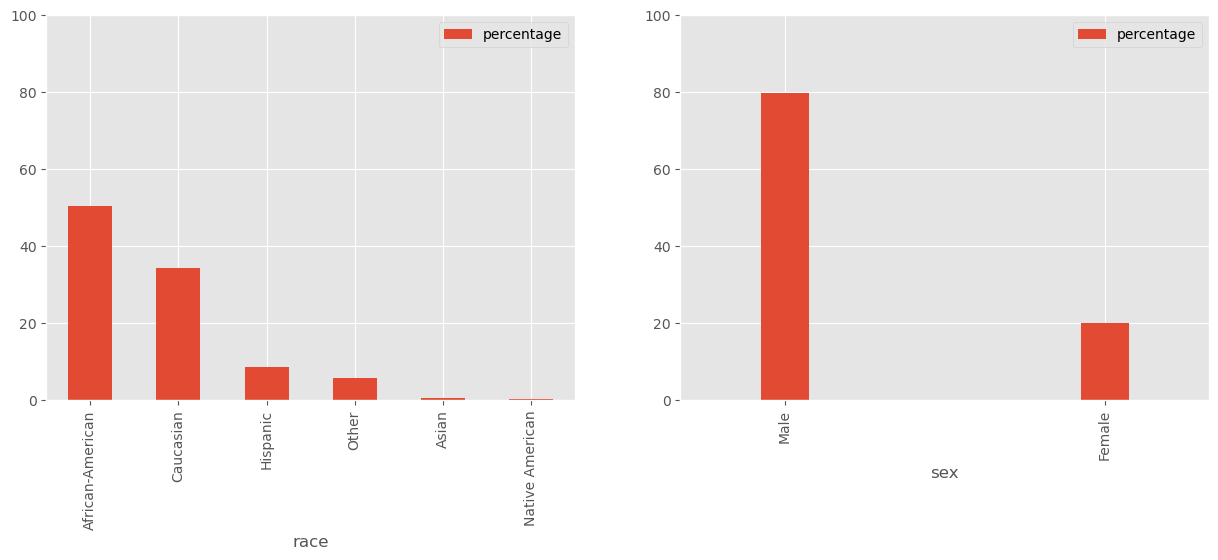

In [15]:
# let's visualize race and sex distributions with a histogram
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

s=crime_df.race.value_counts(normalize=True).mul(100) # mul(100) is == *100
s.index.name,s.name='race','percentage' #setting the name of index and series
#series.to_frame() returns a dataframe
s.to_frame().plot(kind='bar', ax=ax1, ylim=[0,100])


s=crime_df.sex.value_counts(normalize=True).mul(100) # mul(100) is == *100
s.index.name,s.name='sex','percentage' #setting the name of index and series
#series.to_frame() returns a dataframe
s.to_frame().plot(kind='bar', ax = ax2, ylim=[0,100], width=0.15)


Judges are often presented with two sets of scores from the Compas system -- one that classifies people into High, Medium and Low risk, and a corresponding decile score. Let's plot those to get a better idea of what the data looks like


<Axes: title={'center': 'African-American'}, xlabel='decile_score'>

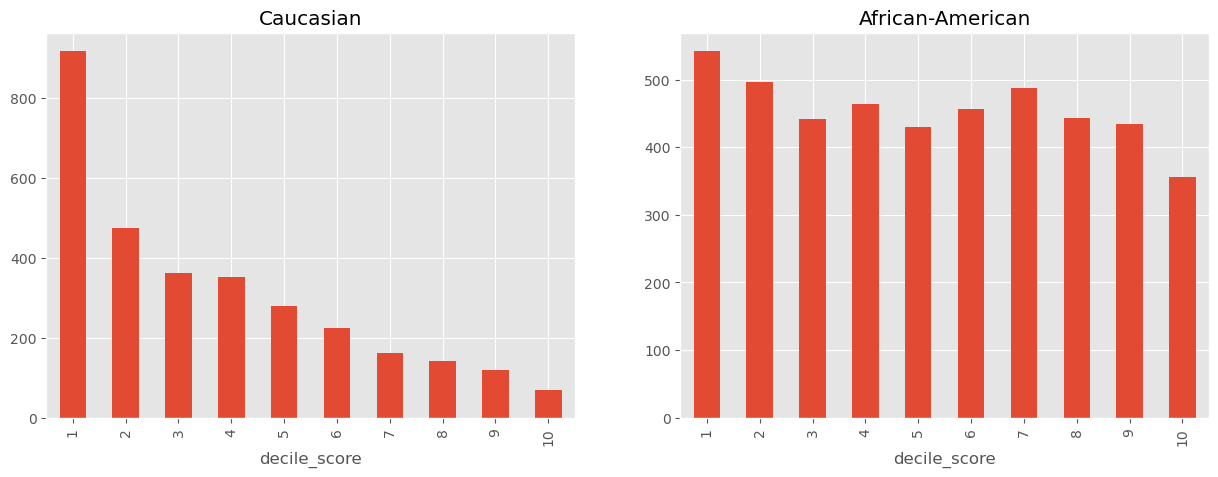

In [16]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and get the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 1x2 grid, and get the second section
ax2 = fig.add_subplot(122)

crime_df[crime_df['race']=='Caucasian'].groupby('decile_score')['race'].count().plot(kind='bar', ax=ax1, title="Caucasian")
crime_df[crime_df['race']=='African-American'].groupby('decile_score')['race'].count().plot(kind='bar', ax=ax2, title="African-American")

In [17]:
# expolore the decile score distribution for a certain race 
crime_df[crime_df['race']=='African-American'].groupby('decile_score')['race'].count().describe

<bound method NDFrame.describe of decile_score
1     542
2     496
3     442
4     464
5     430
6     457
7     487
8     443
9     434
10    356
Name: race, dtype: int64>

In [18]:
crime_df[crime_df['race']=='Caucasian'].groupby('decile_score')['race'].count().describe

<bound method NDFrame.describe of decile_score
1     917
2     474
3     362
4     353
5     279
6     224
7     163
8     143
9     120
10     69
Name: race, dtype: int64>

<Axes: title={'center': "Black Defendant's Decile Scores"}, xlabel='Decile'>

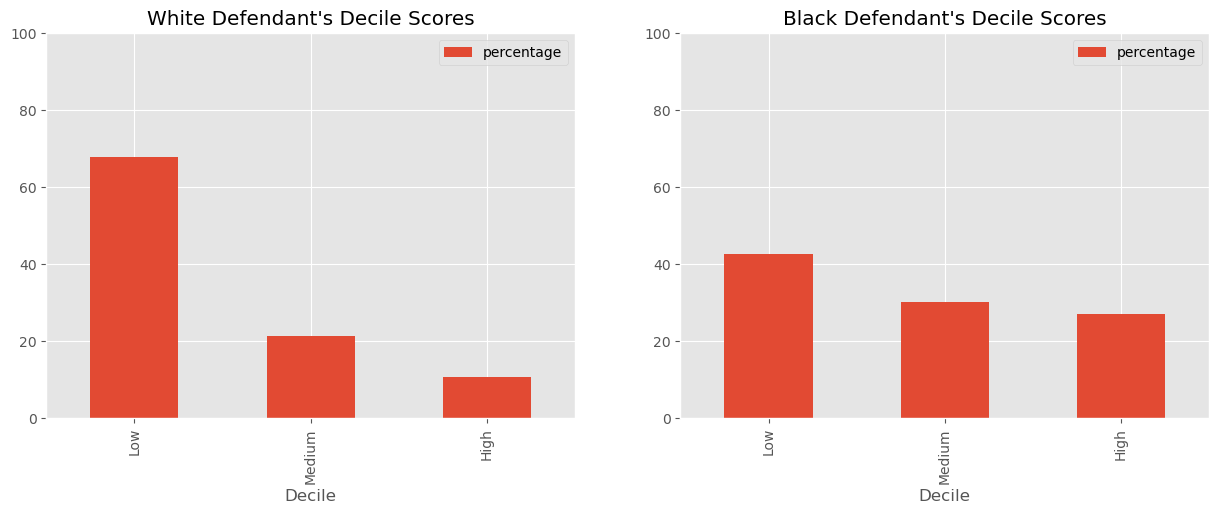

In [19]:
# plot the decile score for Caucasian and Black defendants
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)


s=crime_df[crime_df['race']=='Caucasian'].score_text.value_counts(normalize=True).mul(100) # mul(100) is == *100
s.index.name,s.name='Decile','percentage' #setting the name of index and series
#series.to_frame() returns a dataframe
s.to_frame().plot(kind='bar', ax=ax1, ylim=[0,100], title="White Defendant's Decile Scores")

s=crime_df[crime_df['race']=='African-American'].score_text.value_counts(normalize=True).mul(100) # mul(100) is == *100
s.index.name,s.name='Decile','percentage' #setting the name of index and series
#series.to_frame() returns a dataframe
s.to_frame().plot(kind='bar', ax=ax2, ylim=[0,100], title="Black Defendant's Decile Scores")

# Split the data into training and test sets

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Documentation for train_test_split function:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [21]:
#split the data into 75% for training and 25% for testing, set random_state to an integer number for reproducibility
crime_train1, crime_test1 = train_test_split(crime_df, test_size =0.25, random_state = 7)

In [22]:
# check size of partitions
print(crime_test1.shape)
print(crime_train1.shape)

(2259, 12)
(6777, 12)


In [23]:
# balance the dataset
print(crime_train1['race'].count())
crime_train1['race'].value_counts()

6777


race
African-American    3407
Caucasian           2328
Hispanic             591
Other                399
Asian                 37
Native American       15
Name: count, dtype: int64

Find the required number of resampled records.
For example, if we were interested in increasing the representation of hispanics to 30% 
        
        x = (p(records) - rare) / (1 - p) 

Where x is the required number of resampled records, p is the desired proportion of
rare values in the balanced data set, records is the number of records in the unbalanced
data set, and rare represents the current number of rare target values.

Plug in the numbers from our training set we woulld get

x = (0.3(6777) - 591) / (1 - 0.3)
x = 2060

Using these numbers we can resample our training set.

In [24]:
# find all the records that match the criteria for the resampling
to_resample = crime_train1.loc[crime_train1['race'] =="Hispanic"]

In [25]:
# perform resampling
our_resample = to_resample.sample(n = 2060 , replace = True)

# check the resampled set
our_resample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2060 entries, 3964 to 3996
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      2060 non-null   int64  
 1   c_charge_degree          2060 non-null   object 
 2   race                     2060 non-null   object 
 3   age_cat                  2060 non-null   object 
 4   score_text               2060 non-null   object 
 5   sex                      2060 non-null   object 
 6   priors_count             2060 non-null   int64  
 7   days_b_screening_arrest  2060 non-null   float64
 8   decile_score             2060 non-null   int64  
 9   is_recid                 2060 non-null   int64  
 10  c_jail_in                2060 non-null   object 
 11  c_jail_out               2060 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 209.2+ KB


In [26]:
# add the resampled data to the training set
crime_train_rebal = pd.concat([crime_train1, our_resample])
crime_train_rebal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8837 entries, 4808 to 3996
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      8837 non-null   int64  
 1   c_charge_degree          8837 non-null   object 
 2   race                     8837 non-null   object 
 3   age_cat                  8837 non-null   object 
 4   score_text               8837 non-null   object 
 5   sex                      8837 non-null   object 
 6   priors_count             8837 non-null   int64  
 7   days_b_screening_arrest  8837 non-null   float64
 8   decile_score             8837 non-null   int64  
 9   is_recid                 8837 non-null   int64  
 10  c_jail_in                8837 non-null   object 
 11  c_jail_out               8837 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 897.5+ KB


In [27]:
# resampled distribution of race
crime_train_rebal['race'].value_counts()

race
African-American    3407
Hispanic            2651
Caucasian           2328
Other                399
Asian                 37
Native American       15
Name: count, dtype: int64

#### To Do: Create a new training/testing partitions using an 80%-20% split ratio.

In [28]:
#split the data into 80% for training and 20% for testing
crime_train2, crime_test2 = train_test_split(crime_df, test_size =0.20, random_state = 7)

In [29]:
# check size of partitions
print(crime_test2.shape)
print(crime_train2.shape)

(1808, 12)
(7228, 12)


#### To Do: Using your newly created partition balance the race categories in the dataset. Note that you can ignore the 'other' race value.

In [30]:
# balance the dataset
print(crime_train2['race'].count())
crime_train2['race'].value_counts()

7228


race
African-American    3644
Caucasian           2468
Hispanic             628
Other                432
Asian                 40
Native American       16
Name: count, dtype: int64

## Baseline

If we want to predict the decile score text (low, medium, high) we can look at the distribution of the values we have for this attribute

In [31]:
crime_train_rebal['score_text'].value_counts()

score_text
Low       5284
Medium    2093
High      1460
Name: count, dtype: int64

Since 'Low' is the most occurring value for this target attribute we will use that as the prediction value for any records.
If we use this on our training set we would correctly classify 5260 records and miss-classify 3577 (2130 + 1447) records. This gives us an accuracy around 60%.

Evaluating the model using the same dataset that was used to establish the model is not ideal. That is why we had held out the test set when establishing this baseline so we can get a better idea how this baseline model would perform on unseen data.

Let's see how well we can do with this baseline if we used the test partition we held out.

Since 'Low' is the most occurring value for this target attribute we will use that as the prediction for our test set.

In [32]:
crime_test1['score_text'].value_counts()

score_text
Low       1288
Medium     559
High       412
Name: count, dtype: int64

Using this baseline model we would correctly classify 1288 test cases and incorrectly classify 971 (559 + 412) cases. Our accuracy is around 57%


#### TO DO: Using a similar approach for establishing a baseline what would our accuracy be if our target attribute is 'c_charge_degree'?

In [34]:
crime_test1['c_charge_degree'].value_counts()

c_charge_degree
(F3)     1236
(M1)      637
(F2)      182
(M2)      147
(F1)       23
(F7)       20
(MO3)      10
(NI0)       2
(F5)        1
(CO3)       1
Name: count, dtype: int64

In [35]:
crime_train_rebal['c_charge_degree'].value_counts()

c_charge_degree
(F3)     4652
(M1)     2557
(F2)      691
(M2)      661
(F1)      128
(F7)       88
(MO3)      42
(F5)        8
(NI0)       3
(TCX)       3
(F6)        3
(X)         1
Name: count, dtype: int64

In [36]:
crime_test2['c_charge_degree'].value_counts()

c_charge_degree
(F3)     987
(M1)     511
(F2)     145
(M2)     121
(F1)      17
(F7)      15
(MO3)      8
(NI0)      2
(F5)       1
(CO3)      1
Name: count, dtype: int64